In [21]:
import doralite

In [20]:
import gfdl_utils.core as gu

In [166]:
exp = "odiv-296"
pp = doralite.dora_metadata(exp)['pathPP']
pp

'/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/gfdl.ncrc5-intel23-prod/pp/'

In [167]:
ppnames = gu.find_variable(pp, 'TKE_itidal')
ppnames

['ocean_annual', 'ocean_annual_1x1deg']

In [168]:
ppname = ppnames[0]
local = gu.get_local(pp, ppname, "ts")

In [169]:
path = gu.get_pathspp(pp, ppname, "ts", local, "*", "*")
path_static = gu.get_pathstatic(pp, pp_name)
path, path_static

('/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/gfdl.ncrc5-intel23-prod/pp//ocean_annual/ts/annual/5yr/ocean_annual.*.*.nc',
 '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/gfdl.ncrc5-intel23-prod/pp//ocean_annual/ocean_annual.static.nc')

In [170]:
import xarray as xr
ds = xr.open_mfdataset(path, engine="netcdf4")
grid = xr.open_dataset(path_static)

In [171]:
dissip = (ds['TKE_itidal']*grid['areacello'].values).mean('time').compute()
smoothed_depth = grid.deptho.fillna(0.).rolling({"xh":8, "yh":8}).mean()

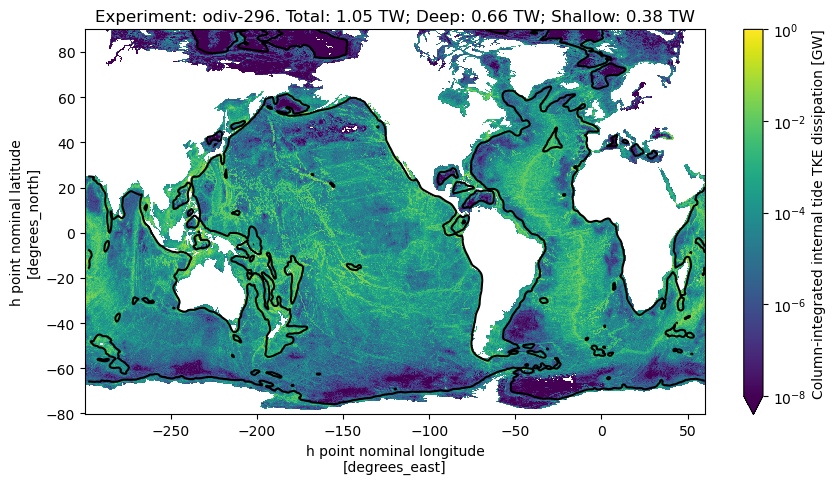

In [172]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

deep = 2500
pc = (dissip*1e-9).plot(norm=matplotlib.colors.LogNorm(vmin=1.e-8, vmax=1))
pc.colorbar.set_label("Column-integrated internal tide TKE dissipation [GW]")
smoothed_depth.plot.contour(colors="k", linestyles="solid", levels=[deep]);

total_dissip = dissip.sum().values * 1e-12
deep_dissip = dissip.where(smoothed_depth > deep).sum().values * 1e-12
shallow_dissip = dissip.where(smoothed_depth <= deep).sum().values * 1e-12

plt.title(f"Experiment: {exp}. Total: {np.round(total_dissip, 2)} TW; Deep: {np.round(deep_dissip, 2)} TW; Shallow: {np.round(shallow_dissip, 2)} TW");